C:\Users\KOMMURAKESH\AppData\Local\Temp\ipykernel_25572\2822020952.py:24: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():
C:\Users\KOMMURAKESH\AppData\Local\Temp\ipykernel_25572\2822020952.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_incidents', y='state_ut_name', data=df_state_counts.head(10),
C:\Users\KOMMURAKESH\AppData\Local\Temp\ipykernel_25572\2822020952.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_loss', y='cybercrime_category', data=df_cat_loss,
C:\Users\KOMMURAKESH\AppData\Lo

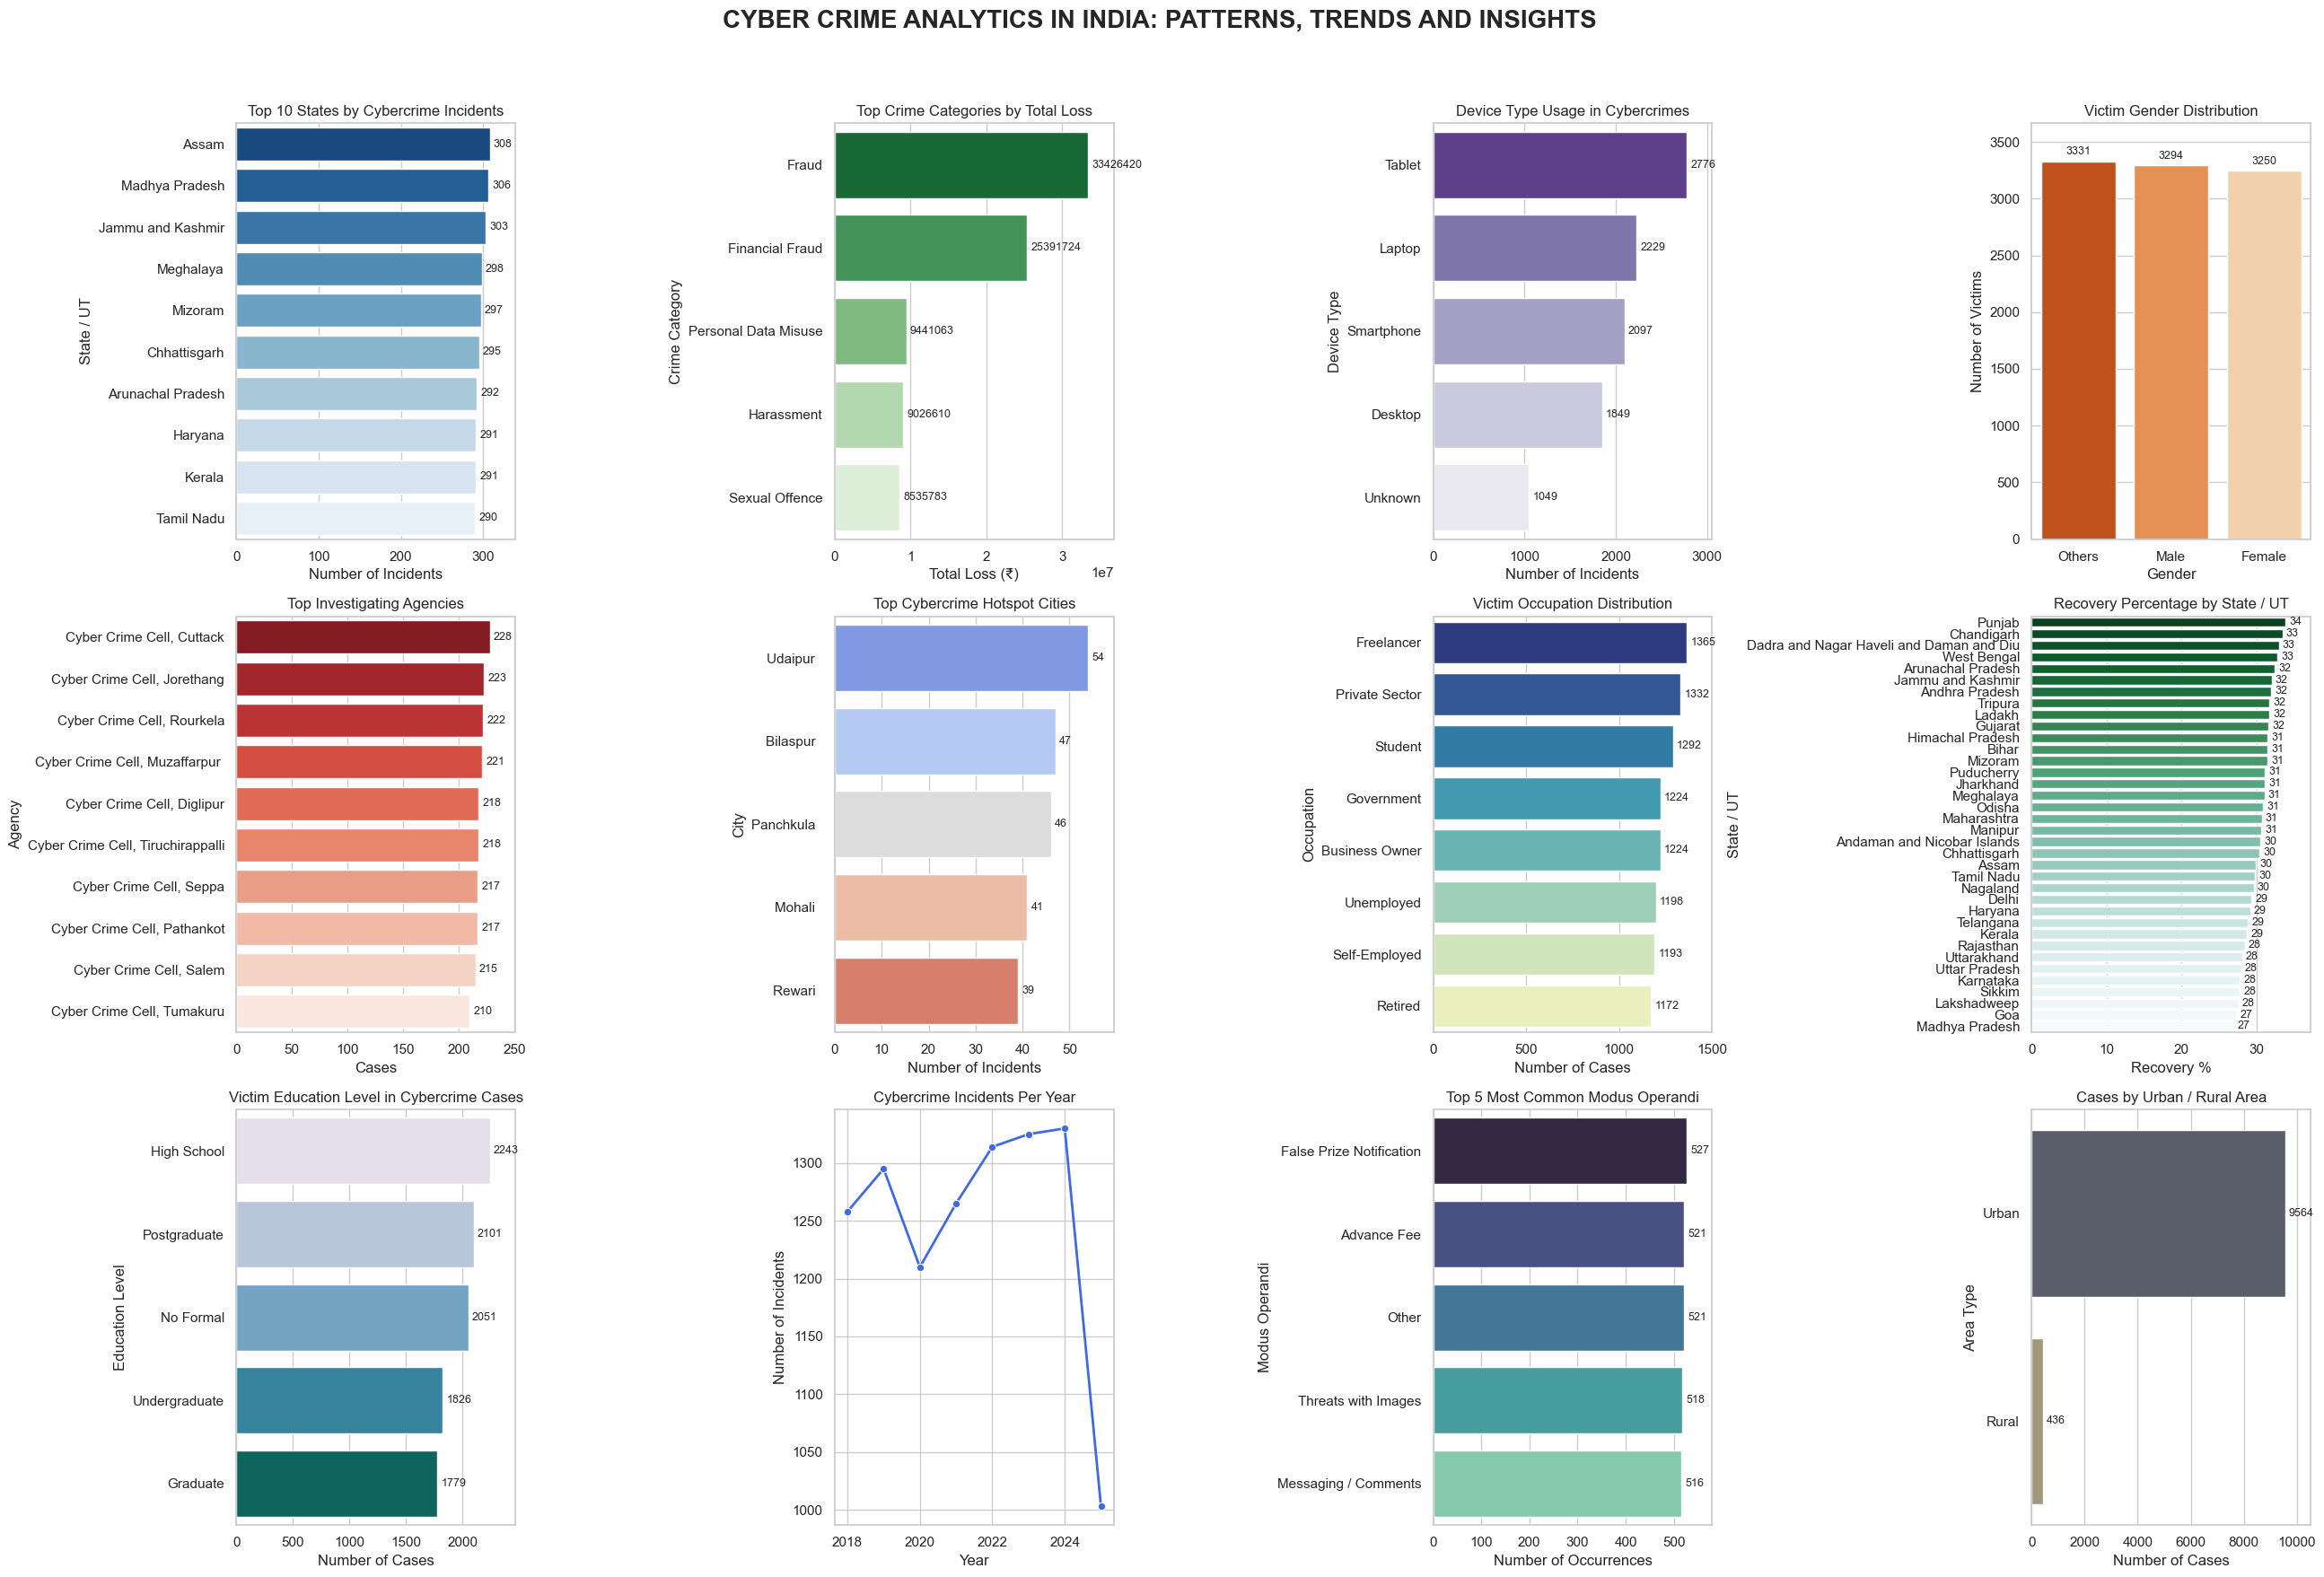

In [1]:
# ==========================================
# CYBER CRIME ANALYTICS DASHBOARD – MYSQL STORED PROCEDURES
# Project: CYBER CRIME ANALYTICS IN INDIA: PATTERNS, TRENDS AND INSIGHTS
# ==========================================

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ MySQL Connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ReDiscover@30",          
    database="cybercrimeanalytics"     
)
cursor = connection.cursor()

# 2️⃣ Utility Function
def fetch_data(proc_name):
    """Fetch data from stored procedures without parameters"""
    cursor.callproc(proc_name)
    for result in cursor.stored_results():
        return pd.DataFrame(result.fetchall(), columns=[desc[0] for desc in result.description])

# 3️⃣ Stored Procedure Calls (no parameters)
df_state_counts     = fetch_data("CountIncidentsPerState")
df_cat_loss         = fetch_data("Top5CategoriesByLoss")
df_device_usage     = fetch_data("DeviceTypeUsageCount")
df_gender_victims   = fetch_data("VictimsWithLocation")
df_agency_cases     = fetch_data("CasesPerAgency")
df_city_counts      = fetch_data("Top5CitiesByIncidents")
df_occupation       = fetch_data("CrimesByOccupation")
df_recovery_state   = fetch_data("RecoveryPercentageByState")
df_education_level  = fetch_data("CrimesByEducationLevel")
df_incidents_year   = fetch_data("IncidentsPerYear")
df_modus_operandi   = fetch_data("Top5ModusOperandi")
df_urban_rural      = fetch_data("CasesByUrbanRuralFlag")

# 4️⃣ Visualization Setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (26, 18)
fig, axes = plt.subplots(3, 4, figsize=(26, 18))
axes = axes.flatten()

# Helper Function: Add value labels to bars
def add_value_labels(ax, orientation='v'):
    """Add data labels to bars (v = vertical, h = horizontal)"""
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)
    if orientation == 'v':
        ax.margins(y=0.1)
    else:
        ax.margins(x=0.1)

# ----- 1️⃣ Top 10 States by Incidents -----
sns.barplot(x='total_incidents', y='state_ut_name', data=df_state_counts.head(10),
            ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 10 States by Cybercrime Incidents")
axes[0].set_xlabel("Number of Incidents")
axes[0].set_ylabel("State / UT")
add_value_labels(axes[0], 'h')

# ----- 2️⃣ Top Crime Categories by Loss -----
sns.barplot(x='total_loss', y='cybercrime_category', data=df_cat_loss,
            ax=axes[1], palette='Greens_r')
axes[1].set_title("Top Crime Categories by Total Loss")
axes[1].set_xlabel("Total Loss (₹)")
axes[1].set_ylabel("Crime Category")
add_value_labels(axes[1], 'h')

# ----- 3️⃣ Device Type Usage -----
sns.barplot(x='total_incidents', y='device_type', data=df_device_usage.head(10),
            ax=axes[2], palette='Purples_r')
axes[2].set_title("Device Type Usage in Cybercrimes")
axes[2].set_xlabel("Number of Incidents")
axes[2].set_ylabel("Device Type")
add_value_labels(axes[2], 'h')

# ----- 4️⃣ Victim Gender Distribution -----
gender_data = df_gender_victims['gender'].value_counts().reset_index()
gender_data.columns = ['Gender', 'Count']
sns.barplot(x='Gender', y='Count', data=gender_data, ax=axes[3], palette='Oranges_r')
axes[3].set_title("Victim Gender Distribution")
axes[3].set_xlabel("Gender")
axes[3].set_ylabel("Number of Victims")
add_value_labels(axes[3], 'v')

# ----- 5️⃣ Top Investigating Agencies -----
sns.barplot(x='total_cases_handled', y='investigating_agency', data=df_agency_cases.head(10),
            ax=axes[4], palette='Reds_r')
axes[4].set_title("Top Investigating Agencies")
axes[4].set_xlabel("Cases")
axes[4].set_ylabel("Agency")
add_value_labels(axes[4], 'h')

# ----- 6️⃣ Hotspot Cities -----
sns.barplot(x='total_incidents', y='city_name', data=df_city_counts.head(10),
            ax=axes[5], palette='coolwarm')
axes[5].set_title("Top Cybercrime Hotspot Cities")
axes[5].set_xlabel("Number of Incidents")
axes[5].set_ylabel("City")
add_value_labels(axes[5], 'h')

# ----- 7️⃣ Victim Occupation -----
sns.barplot(x='total_cases', y='occupation',
            data=df_occupation.sort_values('total_cases', ascending=False).head(10),
            ax=axes[6], palette='YlGnBu_r')
axes[6].set_title("Victim Occupation Distribution")
axes[6].set_xlabel("Number of Cases")
axes[6].set_ylabel("Occupation")
add_value_labels(axes[6], 'h')

# ----- 8️⃣ Recovery Percentage by State -----
df_recovery_state['recovery_percentage'] = (
    df_recovery_state['recovery_percentage'].astype(str)
    .str.replace('%','', regex=False).astype(float)
)
sns.barplot(x='recovery_percentage', y='state_ut_name',
            data=df_recovery_state.sort_values('recovery_percentage', ascending=False),
            ax=axes[7], palette='BuGn_r')
axes[7].set_title("Recovery Percentage by State / UT")
axes[7].set_xlabel("Recovery %")
axes[7].set_ylabel("State / UT")
add_value_labels(axes[7], 'h')

# ----- 9️⃣ Victim Education Level -----
sns.barplot(x='total_cases', y='education_level',
            data=df_education_level.sort_values('total_cases', ascending=False),
            ax=axes[8], palette='PuBuGn')
axes[8].set_title("Victim Education Level in Cybercrime Cases")
axes[8].set_xlabel("Number of Cases")
axes[8].set_ylabel("Education Level")
add_value_labels(axes[8], 'h')

# ----- 🔟 Incidents Per Year -----
sns.lineplot(x='year', y='total_incidents', data=df_incidents_year,
             marker='o', linewidth=2, ax=axes[9], color='royalblue')
axes[9].set_title("Cybercrime Incidents Per Year")
axes[9].set_xlabel("Year")
axes[9].set_ylabel("Number of Incidents")

# ----- 1️⃣1️⃣ Most Common Modus Operandi -----
sns.barplot(
    x='Occurrence_Count',
    y='Modus_Operandi',
    data=df_modus_operandi.sort_values('Occurrence_Count', ascending=False),
    ax=axes[10],
    palette='mako'
)
axes[10].set_title("Top 5 Most Common Modus Operandi")
axes[10].set_xlabel("Number of Occurrences")
axes[10].set_ylabel("Modus Operandi")
add_value_labels(axes[10], 'h')

# ----- 1️⃣2️⃣ Cases by Urban / Rural Flag -----
sns.barplot(x='total_cases', y='urban_rural_flag',
            data=df_urban_rural, ax=axes[11], palette='cividis')
axes[11].set_title("Cases by Urban / Rural Area")
axes[11].set_xlabel("Number of Cases")
axes[11].set_ylabel("Area Type")
add_value_labels(axes[11], 'h')

# ===== Final Layout =====
plt.suptitle("CYBER CRIME ANALYTICS IN INDIA: PATTERNS, TRENDS AND INSIGHTS",
             fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

# 6️⃣ Close MySQL Connection
cursor.close()
connection.close()
